In [1]:
import numpy as np
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

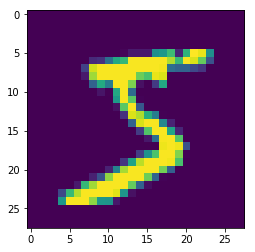

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

In [4]:
import tensorflow as tf
s = tf.InteractiveSession()

In [5]:
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28]))
model.add(ll.Flatten())

# network body
model.add(ll.Dense(256))
model.add(ll.Activation('relu'))

model.add(ll.Dense(128))
model.add(ll.Activation('relu'))

model.add(ll.Dense(128))
model.add(ll.Activation('relu'))

# output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10, activation='softmax'))

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
__________

In [7]:
# fit(X,y) ships with a neat automatic logging.
#          Highly customizable under the hood.
model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=5);

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 13s 269us/step - loss: 0.2300 - acc: 0.9307 - val_loss: 0.1186 - val_acc: 0.9634
Epoch 2/5
50000/50000 [==============================] - 12s 249us/step - loss: 0.0989 - acc: 0.9694 - val_loss: 0.1040 - val_acc: 0.9703
Epoch 3/5
50000/50000 [==============================] - 12s 246us/step - loss: 0.0700 - acc: 0.9773 - val_loss: 0.0836 - val_acc: 0.9761
Epoch 4/5
50000/50000 [==============================] - 12s 249us/step - loss: 0.0536 - acc: 0.9828 - val_loss: 0.0838 - val_acc: 0.9763
Epoch 5/5
50000/50000 [==============================] - 12s 245us/step - loss: 0.0459 - acc: 0.9854 - val_loss: 0.0867 - val_acc: 0.9753


In [8]:
# Performance on Test Set
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

In [9]:
print(test_accuracy*100,'%')

97.78999999999999 %
